In [1]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import wandb


api = wandb.Api()
entity, project = "wwjbrugger", "NGSR_10_05"
runs = api.runs(entity + "/" + project)

In [2]:
results={}
for run in runs:
    #result_summary = run.summary._json_dict['experiment_name']
    seed = run.config['seed']
    experiment_name = run.config['experiment_name']
    if str(experiment_name).startswith('only_dataset_encoder'):
        result_dict = run.history(keys=['Test Contrastive loss', 'iteration'])
        if not experiment_name in results:
            results[experiment_name] = {}
        results[experiment_name][seed] = result_dict


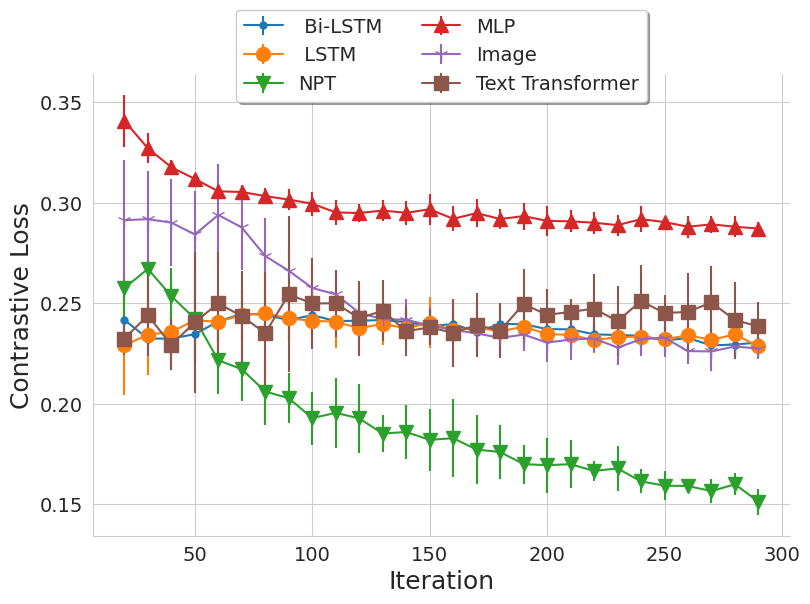

In [5]:
import numpy as np
experiment_name = {
    'only_dataset_encoder__neural_net__data_grammar_8_run_1__Bi_LSTM_Measurement_Encoder__abs_max_y__Endgame__10__10': ' Bi-LSTM',
    'only_dataset_encoder__neural_net__data_grammar_8_run_1__LSTM_Measurement_Encoder__abs_max_y__Endgame__10__10': ' LSTM',
    'only_dataset_encoder__neural_net__data_grammar_8_run_1__DatasetTransformer__abs_max_y__Endgame__10__10': 'NPT',
    'only_dataset_encoder__neural_net__data_grammar_8_run_1__MLP_Measurement_Encoder__abs_max_y__Endgame__10__10': 'MLP',
    'only_dataset_encoder__neural_net__data_grammar_8_run_1__MeasurementEncoderPicture__abs_max_y__Endgame__10__10': 'Image',
    'only_dataset_encoder__neural_net__data_grammar_8_run_1__TextTransformer__abs_max_y__Endgame__10__10': 'Text Transformer',
    #'only_dataset_encoder__neural_net__data_grammar_8_run_1__MeasurementEncoderDummy__abs_max_y__Endgame__10__10': 'No Dataset'
}
plt.rcParams.update({
    # 'text.usetex': True,
    # 'font.family': 'Helvetica',
    'axes.labelsize': 18,
    'text.latex.preamble': r'usepackage{amsmath}',
    'axes.titlesize': 'x-large',
    'xtick.labelsize': 14,
    'ytick.labelsize': 14,
    'legend.fontsize': 14,
    'lines.markersize':10
    
})
fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(111)
markers = ['.', "o", "v","^","1", "s","p"]
i = 0
for wandb_name, experiment in experiment_name.items():
    test_contrastive_loss =  []
    for seed, d in results[wandb_name].items():
        test_contrastive_loss.append(d.loc[:,'Test Contrastive loss'].to_numpy())
        iterations = d.loc[:,'iteration'].to_numpy()
    test_contrastive_loss = np.array(test_contrastive_loss)
    mean = test_contrastive_loss.mean(axis=0)
    std = test_contrastive_loss.std(axis=0)
    ax.errorbar(x=iterations, y=mean,yerr=std, label=experiment, marker=markers[i] )
    i+=1
ax.set_xlabel('Iteration')
ax.set_ylabel('Contrastive Loss')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.16),
          ncol=2, fancybox=True, shadow=True)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()
fig.savefig('./ContrastiveLoss.pdf')

# 
# 
# 
# 
# plt.show()